### Preprocessing data 

* This notebook is used for cleaning the data that is subsequently used for other tasks

### import libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOAD DATA

df_benchmark = pd.read_csv('nyc_taxi_trip_duration.csv')
df_benchmark.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


## From the EDA file, looking at the analysis, we will preprocess the data

In [3]:
# IT WAS ANALYSED THAT THERE WERE EXTREME OUTLIERS IN THE DATASET

df_benchmark['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

In [4]:
# LOOKING AT THE 10 LARGEST VALUES AND THE SMALLEST VALUE

print('The value of largest 10 trip duration values are as follows : \n {} '.format(df_benchmark['trip_duration'].nlargest(10)))
print('\nThe the number of rows with 1 sec as their trip duration values is {}'.format(len(df_benchmark[df_benchmark['trip_duration']==1])))

The value of largest 10 trip duration values are as follows : 
 21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64 

The the number of rows with 1 sec as their trip duration values is 13


*  As seen from the EDA and considering the above values, we see that there is 1 very large value and there are trips that have lasted for just 1 second which are mostly error in data so we can remove them

In [5]:
df_benchmark=df_benchmark[df_benchmark.trip_duration!=df_benchmark.trip_duration.max()]
df_benchmark=df_benchmark[df_benchmark.trip_duration!=df_benchmark.trip_duration.min()]

* There are no missing values as seen from EDA , so we will reformat data like datetime and categorical variables

In [6]:
# converting strings to datetime features

df_benchmark['pickup_datetime'] = pd.to_datetime(df_benchmark.pickup_datetime)
df_benchmark['dropoff_datetime'] = pd.to_datetime(df_benchmark.dropoff_datetime)

####  we will create pickup hour, day and month

These 3 reveal relationship in the EDA analysis with the target variable

In [7]:
df_benchmark['pickup_month']=df_benchmark['pickup_datetime'].dt.month             # for month
df_benchmark['pickup_day_of_week'] = df_benchmark['pickup_datetime'].dt.weekday   #for weekday
df_benchmark['pickup_hour_of_day'] = df_benchmark['pickup_datetime'].dt.hour      #for hour
df_benchmark['pickup_day'] = df_benchmark['pickup_datetime'].dt.day               #for day
df_benchmark['pickup_min'] = df_benchmark['pickup_datetime'].dt.minute            #for minute 

#### Passenger count

In [8]:
df_benchmark.passenger_count.value_counts()

1    517403
2    105096
5     38926
3     29692
6     24107
4     14050
0        32
7         1
9         1
Name: passenger_count, dtype: int64

Text(0, 0.5, 'Frequency')

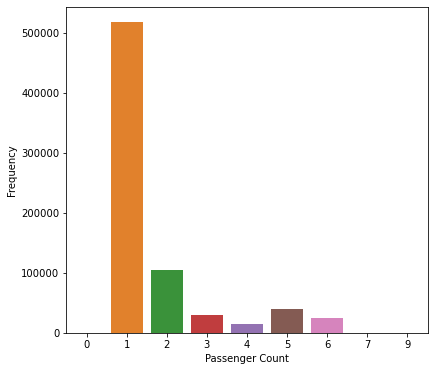

In [9]:
# Plotting the frequency of passenger count from EDA notebook

plt.figure(figsize=(22, 6))
plt.subplot(131)
sns.countplot(df_benchmark['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

* As we see, counts of 9 and 7 are very small compared to others. And there are 32 trips with 0 passengers which is most likely an input error, so we will get rid of those

In [10]:
df_benchmark=df_benchmark[df_benchmark.passenger_count<=6]
df_benchmark=df_benchmark[df_benchmark.passenger_count!=0]

### Lattitude & Longitude

* From the EDA it was analysed that the latitude and longitude of majority of rides were concentrated over a specific location within New York

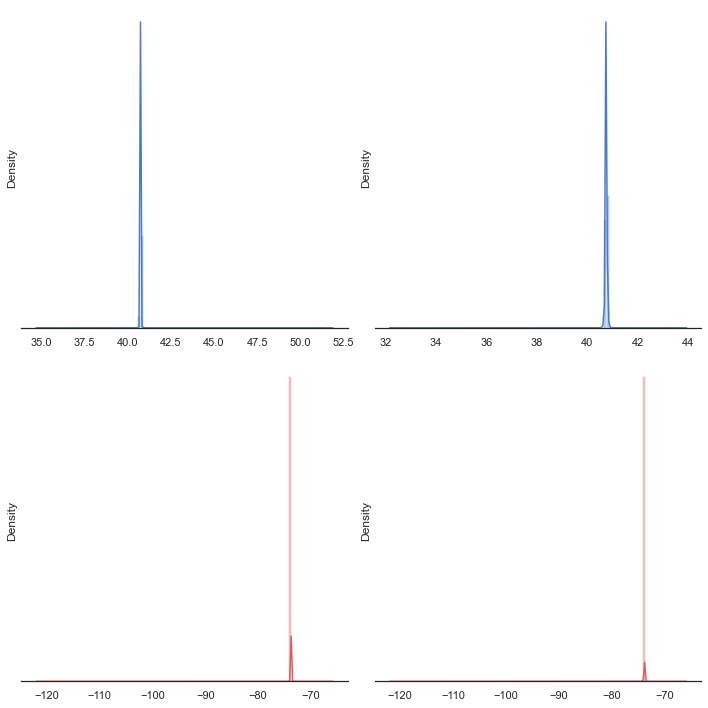

In [11]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df_benchmark['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_benchmark['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(df_benchmark['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sns.distplot(df_benchmark['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

* There are outliers which are not of majority and can be removed

In [12]:
df_benchmark = df_benchmark.loc[(df_benchmark.pickup_latitude > 40.6) & (df_benchmark.pickup_latitude < 40.9)]
df_benchmark = df_benchmark.loc[(df_benchmark.dropoff_latitude>40.6) & (df_benchmark.dropoff_latitude < 40.9)]
df_benchmark = df_benchmark.loc[(df_benchmark.dropoff_longitude > -74.05) & (df_benchmark.dropoff_longitude < -73.7)]
df_benchmark = df_benchmark.loc[(df_benchmark.pickup_longitude > -74.05) & (df_benchmark.pickup_longitude < -73.7)]

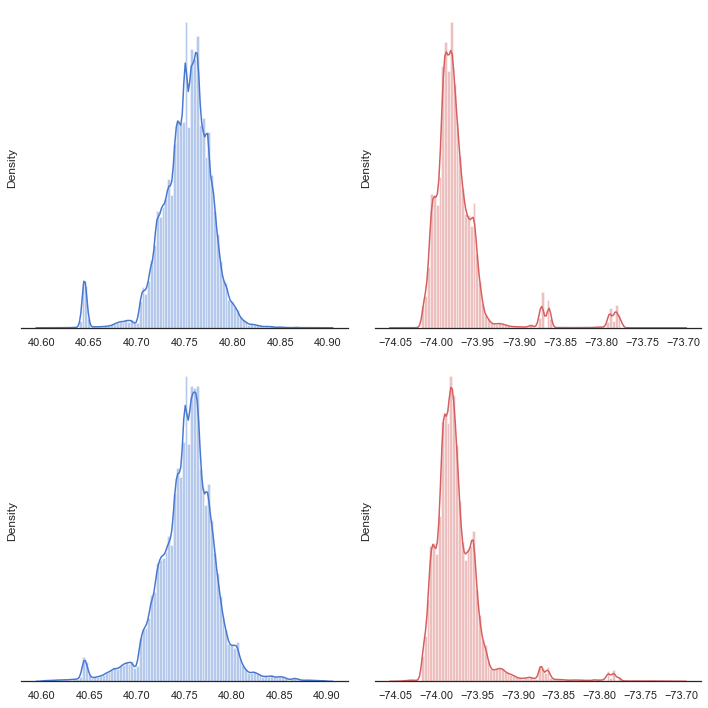

In [13]:
df_data_new = df_benchmark.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

* From the EDA book, it can be seen that now it follows a normal distribution of sorts, and we see that most trips are concentrated between these lat long only.

#### Distance between coordinates using haversine distance

In [14]:
import haversine as hs

def hs_distance(df):
    
    loc1 = (df.pickup_latitude,df.pickup_longitude)
    loc2 = (df.dropoff_latitude,df.dropoff_longitude)
    
    return hs.haversine(loc1,loc2)

# This gives geospatial distance in kms
# We will apply this as a column for each pickup and dropoff location


In [15]:
df_benchmark['distance'] = df_benchmark.apply(lambda x: hs_distance(x), axis = 1)

In [16]:
df_benchmark['distance'].max(),df_benchmark['distance'].min()

(33.070934009447086, 0.0)

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

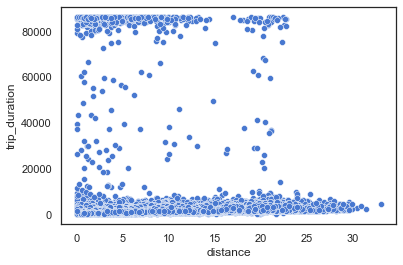

In [17]:
# Looking at the distribution of distance feature to look for outliers

sns.scatterplot(x='distance',y='trip_duration',data=df_benchmark)

* From this we can see that sometimes due to traffic, a shorter distance can also take a lot of time although beyond 20 kms we see that it takes nearly constant and less time which could mean that those places are outside the heart of city. 
* The important observation is that there are trip duration values for 0 km which are outliers

In [18]:
print('The no of trips with distance of 0km are {}'.format(len(df_benchmark[df_benchmark.distance==0])))

The no of trips with distance of 0km are 2745


In [19]:
# Since there are a lot of those, they could be an error, such as faulty odometer reading. So we will replace with average value of distance

mean_dist = df_benchmark['distance'].mean()
df_benchmark.loc[df_benchmark['distance']==0,'distance'] = mean_dist


* From the distance - trip duration scatter plot we saw that some trips within 5 km took around a whole day, which are extreme but we can look at distribution using log transform 


<AxesSubplot:xlabel='log_distance', ylabel='log_trip_duration'>

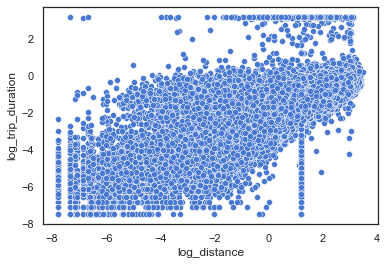

In [20]:
df_benchmark['log_distance']=np.log(df_benchmark.distance)
df_benchmark['log_trip_duration']=np.log(df_benchmark.trip_duration/3600)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=df_benchmark)

* Here its mostly a linear relationship except at a few points , for eg, points of log_trip_duration > 2 . Hence we will drop it off

In [21]:
df_benchmark=df_benchmark[df_benchmark.log_trip_duration<2]

In [22]:
# Looking at the columns of dataframe after preprocessing

df_benchmark.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'pickup_day_of_week',
       'pickup_hour_of_day', 'pickup_day', 'pickup_min', 'distance',
       'log_distance', 'log_trip_duration'],
      dtype='object')

In [23]:
# We wont need all columns so we'll drop those we created for visualisation

df_benchmark.drop(['log_distance','log_trip_duration'],axis =1, inplace = True)

In [24]:
# Saving the cleaned data in a new csv file

df_benchmark.to_csv('cleaned_nyctrip_data.csv',index = False)